In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0ef465696f6cdd81f71b2964bad628ba379174d98bf5a59f958c7de0f7958004
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


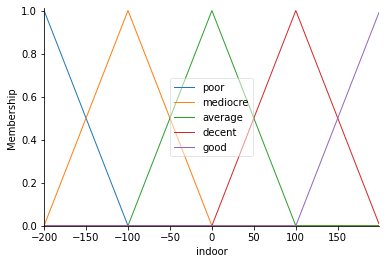

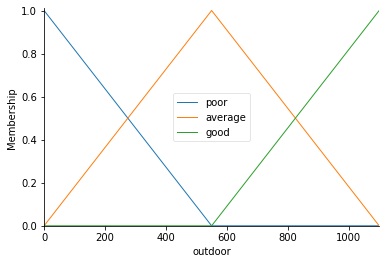

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
indoor = ctrl.Antecedent(np.arange(-200, 200, 1), 'indoor')
outdoor = ctrl.Antecedent(np.arange(0, 1100, 1), 'outdoor')
blinds = ctrl.Consequent(np.arange(-64, 64, 1), 'blinds')
leds = ctrl.Consequent(np.arange(-80, 80, 1), 'leds')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
indoor['poor'] = fuzz.trimf(indoor.universe, [-200, -200, -100])
indoor['mediocre'] = fuzz.trimf(indoor.universe, [-200, -100, 0])
indoor['average'] = fuzz.trimf(indoor.universe, [-100, 0, 100])
indoor['decent'] = fuzz.trimf(indoor.universe, [0, 100, 200])
indoor['good'] = fuzz.trimf(indoor.universe, [100, 200, 200])

outdoor['poor'] = fuzz.trimf(outdoor.universe, [0, 0, 550])
outdoor['average'] = fuzz.trimf(outdoor.universe, [0, 550, 1100])
outdoor['good'] = fuzz.trimf(outdoor.universe, [550, 1100, 1100])

# You can see how these look with .view()
indoor.view()
outdoor.view()

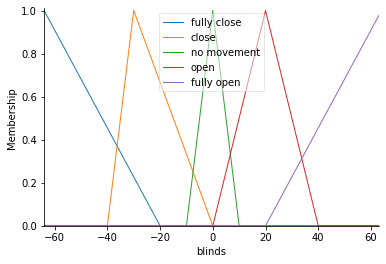

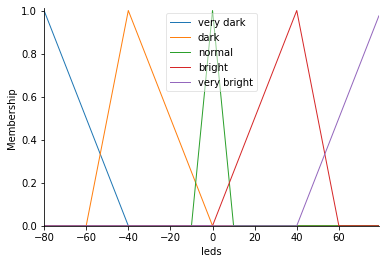

In [ ]:
blinds['fully close'] = fuzz.trimf(blinds.universe, [-64, -64, -20])
blinds['close'] = fuzz.trimf(blinds.universe, [-40, -30, 0])
blinds['no movement'] = fuzz.trimf(blinds.universe, [-10, 0, 10])
blinds['open'] = fuzz.trimf(blinds.universe, [0, 20, 40])
blinds['fully open'] = fuzz.trimf(blinds.universe, [20, 64, 64])

leds['very dark'] = fuzz.trimf(leds.universe, [-80, -80, -40])
leds['dark'] = fuzz.trimf(leds.universe, [-60, -40, 0])
leds['normal'] = fuzz.trimf(leds.universe, [-10, 0, 10])
leds['bright'] = fuzz.trimf(leds.universe, [0, 40, 60])
leds['very bright'] = fuzz.trimf(leds.universe, [40, 80, 80])

blinds.view()
leds.view()

In [ ]:
regra_blinds1 = ctrl.Rule(indoor['poor'] & outdoor['poor'], blinds['fully open'])
regra_blinds2 = ctrl.Rule(indoor['poor'] & outdoor['average'], blinds['fully open'])
regra_blinds3 = ctrl.Rule(indoor['poor'] & outdoor['good'], blinds['open'])
regra_blinds4 = ctrl.Rule(indoor['mediocre'] & outdoor['poor'], blinds['fully open'])
regra_blinds5 = ctrl.Rule(indoor['mediocre'] & outdoor['average'], blinds['open'])
regra_blinds6 = ctrl.Rule(indoor['mediocre'] & outdoor['good'], blinds['open'])
regra_blinds7 = ctrl.Rule(indoor['average'], blinds['no movement'])
regra_blinds8 = ctrl.Rule(indoor['decent'] & outdoor['poor'], blinds['no movement'])
regra_blinds9 = ctrl.Rule(indoor['decent'] & outdoor['average'], blinds['close'])
regra_blinds10 = ctrl.Rule(indoor['decent'] & outdoor['good'], blinds['fully close'])
regra_blinds11 = ctrl.Rule(indoor['good'] & outdoor['poor'], blinds['close'])
regra_blinds12 = ctrl.Rule(indoor['good'] & outdoor['average'], blinds['fully close'])
regra_blinds13 = ctrl.Rule(indoor['good'] & outdoor['good'], blinds['fully close'])

regra_leds1 = ctrl.Rule(indoor['poor'] & outdoor['poor'], leds['very bright'])
regra_leds2 = ctrl.Rule(indoor['poor'] & outdoor['average'], leds['very bright'])
regra_leds3 = ctrl.Rule(indoor['poor'] & outdoor['good'], leds['bright'])
regra_leds4 = ctrl.Rule(indoor['mediocre'] & outdoor['poor'], leds['very bright'])
regra_leds5 = ctrl.Rule(indoor['mediocre'] & outdoor['average'], leds['bright'])
regra_leds6 = ctrl.Rule(indoor['mediocre'] & outdoor['good'], leds['bright'])
regra_leds7 = ctrl.Rule(indoor['average'], leds['normal'])
regra_leds8 = ctrl.Rule(indoor['decent'] & outdoor['poor'], leds['normal'])
regra_leds9 = ctrl.Rule(indoor['decent'] & outdoor['average'], leds['dark'])
regra_leds10 = ctrl.Rule(indoor['decent'] & outdoor['good'], leds['very dark'])
regra_leds11 = ctrl.Rule(indoor['good'] & outdoor['poor'], leds['dark'])
regra_leds12 = ctrl.Rule(indoor['good'] & outdoor['average'], leds['very dark'])
regra_leds13 = ctrl.Rule(indoor['good'] & outdoor['good'], leds['very dark'])


In [ ]:
persiana_ctrl = ctrl.ControlSystem([regra_blinds1, regra_blinds2, regra_blinds3, regra_blinds4, regra_blinds5, regra_blinds6, regra_blinds7, regra_blinds8, regra_blinds9, regra_blinds10, regra_blinds11, regra_blinds12, regra_blinds13])
persiana = ctrl.ControlSystemSimulation(persiana_ctrl)

lampadas_ctrl = ctrl.ControlSystem([regra_leds1, regra_leds2, regra_leds3, regra_leds4, regra_leds5, regra_leds6, regra_leds7, regra_leds8, regra_leds9, regra_leds10, regra_leds11, regra_leds12, regra_leds13])
lampadas = ctrl.ControlSystemSimulation(lampadas_ctrl)

20.0
33.33331133476324


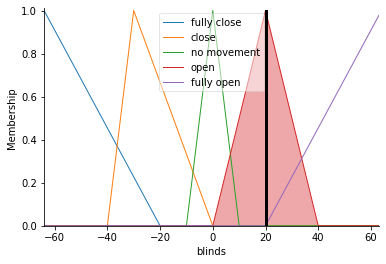

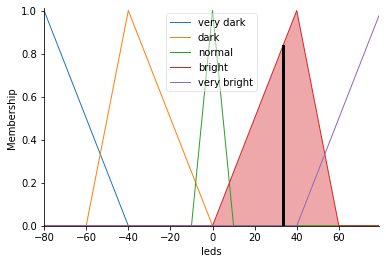

In [ ]:
indoor_light = -100
outdoor_light = 1100

persiana.input['indoor'] = indoor_light
persiana.input['outdoor'] = outdoor_light
persiana.compute()

lampadas.input['indoor'] = indoor_light
lampadas.input['outdoor'] = outdoor_light
lampadas.compute()

print(persiana.output['blinds'])
blinds.view(sim=persiana)

print(lampadas.output['leds'])
leds.view(sim=lampadas)